## 0.0 Imports

In [57]:
import pandas as pd
import numpy  as np

import seaborn as sns
from scipy import interp
import scikitplot as skplt
from matplotlib import pyplot as plt

from sklearn import preprocessing as pp
from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import neighbors as nh
from sklearn import linear_model    as lm

ImportError: cannot import name 'interp' from 'scipy' (c:\Users\andremanzano\OneDrive\Development\CDS_Propensao_Compra_Classificacao\health_insurance\hi_venv\Lib\site-packages\scipy\__init__.py)

### 0.1.Load Datasets

In [3]:
df_raw = pd.read_csv("../data/raw/train.csv")

In [4]:
df_raw = df_raw.reset_index(drop=True)

In [5]:
df_raw

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


## 1.0. Data Description

In [6]:
df_raw.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [7]:
df1 = df_raw.copy()

In [8]:
cols_new = ['id', 'gender', 'age', 'driving_license', 'region_code',
            'previously_insured', 'vehicle_age', 'vehicle_damage',
            'annual_premium','policy_sales_channel', 'vintage', 'response']

df1.columns = cols_new

### 1.1. Data Dimensions

In [9]:
print ( "Number of rows: ", df1.shape[0])
print ( "Number of columns: ", df1.shape[1])

Number of rows:  381109
Number of columns:  12


### 1.2. Data Types

In [10]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

### 1.3. Check NA

In [11]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

### 1.4. Data Descriptive

In [12]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [13]:
num_attributes.describe()

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [14]:
cat_attributes.nunique()

gender            2
vehicle_age       3
vehicle_damage    2
dtype: int64

In [15]:
#Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame(num_attributes.apply( np.median ) ).T

#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame(num_attributes.apply( min ) ).T
d3 = pd.DataFrame(num_attributes.apply( max ) ).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() ) ).T

#concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [16]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,0.000000,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,0.672539,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-21.595182,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-0.115266,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,0.167747,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-0.900008,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,0.003030,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906,3.298788


## 2.0. Feature Engineering

In [17]:
df2 = df1.copy()

In [18]:
# vehicle age
df2['vehicle_age'] =  df2['vehicle_age'].apply( lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' if x == '1-2 Year' else 'below_1_year' ) 

# vehicle damage
df2['vehicle_damage'] =  df2['vehicle_damage'].apply( lambda x: 1 if x == 'Yes' else 0 )

## 3.0. Data Filtering

In [19]:
df3 = df2.copy()

## 4.0. EDA

In [20]:
df4 = df3.copy()

### 4.1. Univariate Analysis

In [21]:
df4.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

In [22]:
#'gender'

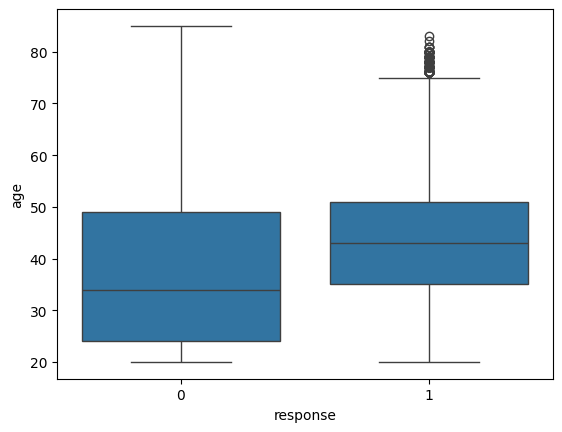

In [23]:
#'age'
sns.boxplot(x='response', y='age', data=df4)
plt.show()

<Axes: xlabel='age', ylabel='Count'>

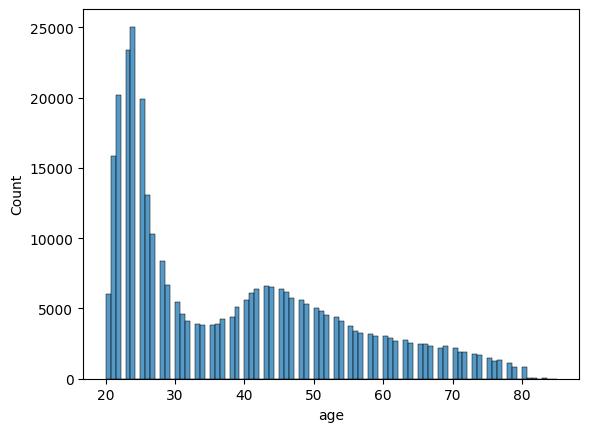

In [24]:
aux00 = df4.loc[df4['response'] == 0, 'age']
sns.histplot(aux00)

<Axes: xlabel='age', ylabel='Count'>

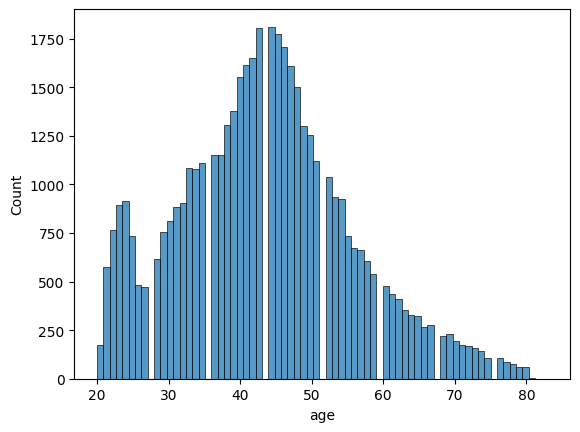

In [25]:
aux00 = df4.loc[df4['response'] == 1, 'age']
sns.histplot(aux00)

<Axes: xlabel='response', ylabel='vintage'>

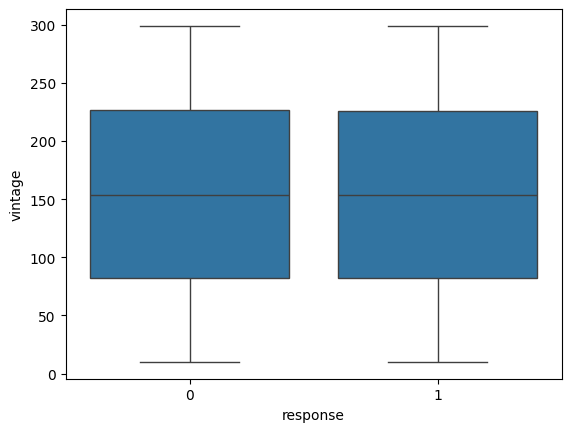

In [26]:
#'annual_premium'
sns.boxplot( x='response', y='vintage', data=df4 )

<Axes: xlabel='response', ylabel='annual_premium'>

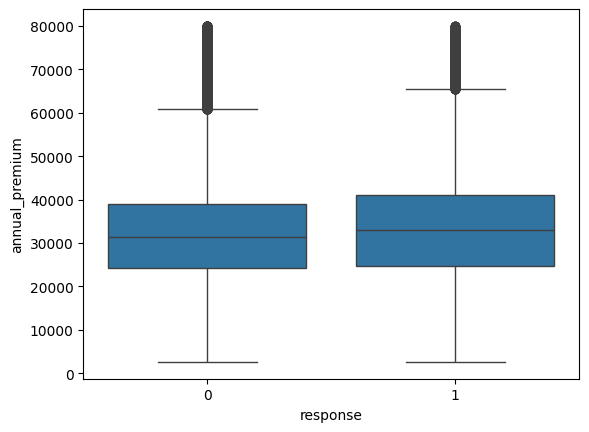

In [30]:
#'annual_premium'
aux = df4[df4['annual_premium'] < 80000]
sns.boxplot( x='response', y='annual_premium', data=aux )

<Axes: xlabel='region_code', ylabel='id'>

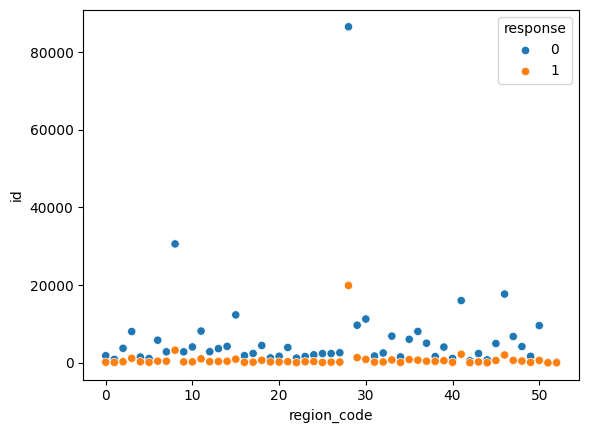

In [27]:
#'region_code'
aux0 = df4[['id', 'region_code', 'response']].groupby( ['region_code', 'response'] ).count().reset_index()

sns.scatterplot( x='region_code', y='id', hue='response', data=aux0 )

In [40]:
#'previously_insured'
pd.crosstab( df4['previously_insured'], df4['response'] ).apply( lambda x: x / x.sum(), axis=1 )

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [29]:
#'vehicle_age'
df4[['vehicle_age', 'response']].value_counts( normalize=True ).reset_index()

,vehicle_age,response,proportion
0,between_1_2_year,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2_year,1,0.091328
3,over_2_years,0,0.029663
4,below_1_year,1,0.018897
5,over_2_years,1,0.012338


In [ ]:
#'vehicle_damage'

In [28]:
#'driving_license'
aux = df4[['driving_license', 'response']].groupby( 'response' ).sum().reset_index()
aux.head()
aux['driving_license_perc'] = aux['driving_license'] / aux['driving_license'].sum()
#sns.barplot( x='response', y='driving_license', data=aux )

<Axes: xlabel='response', ylabel='policy_sales_channel'>

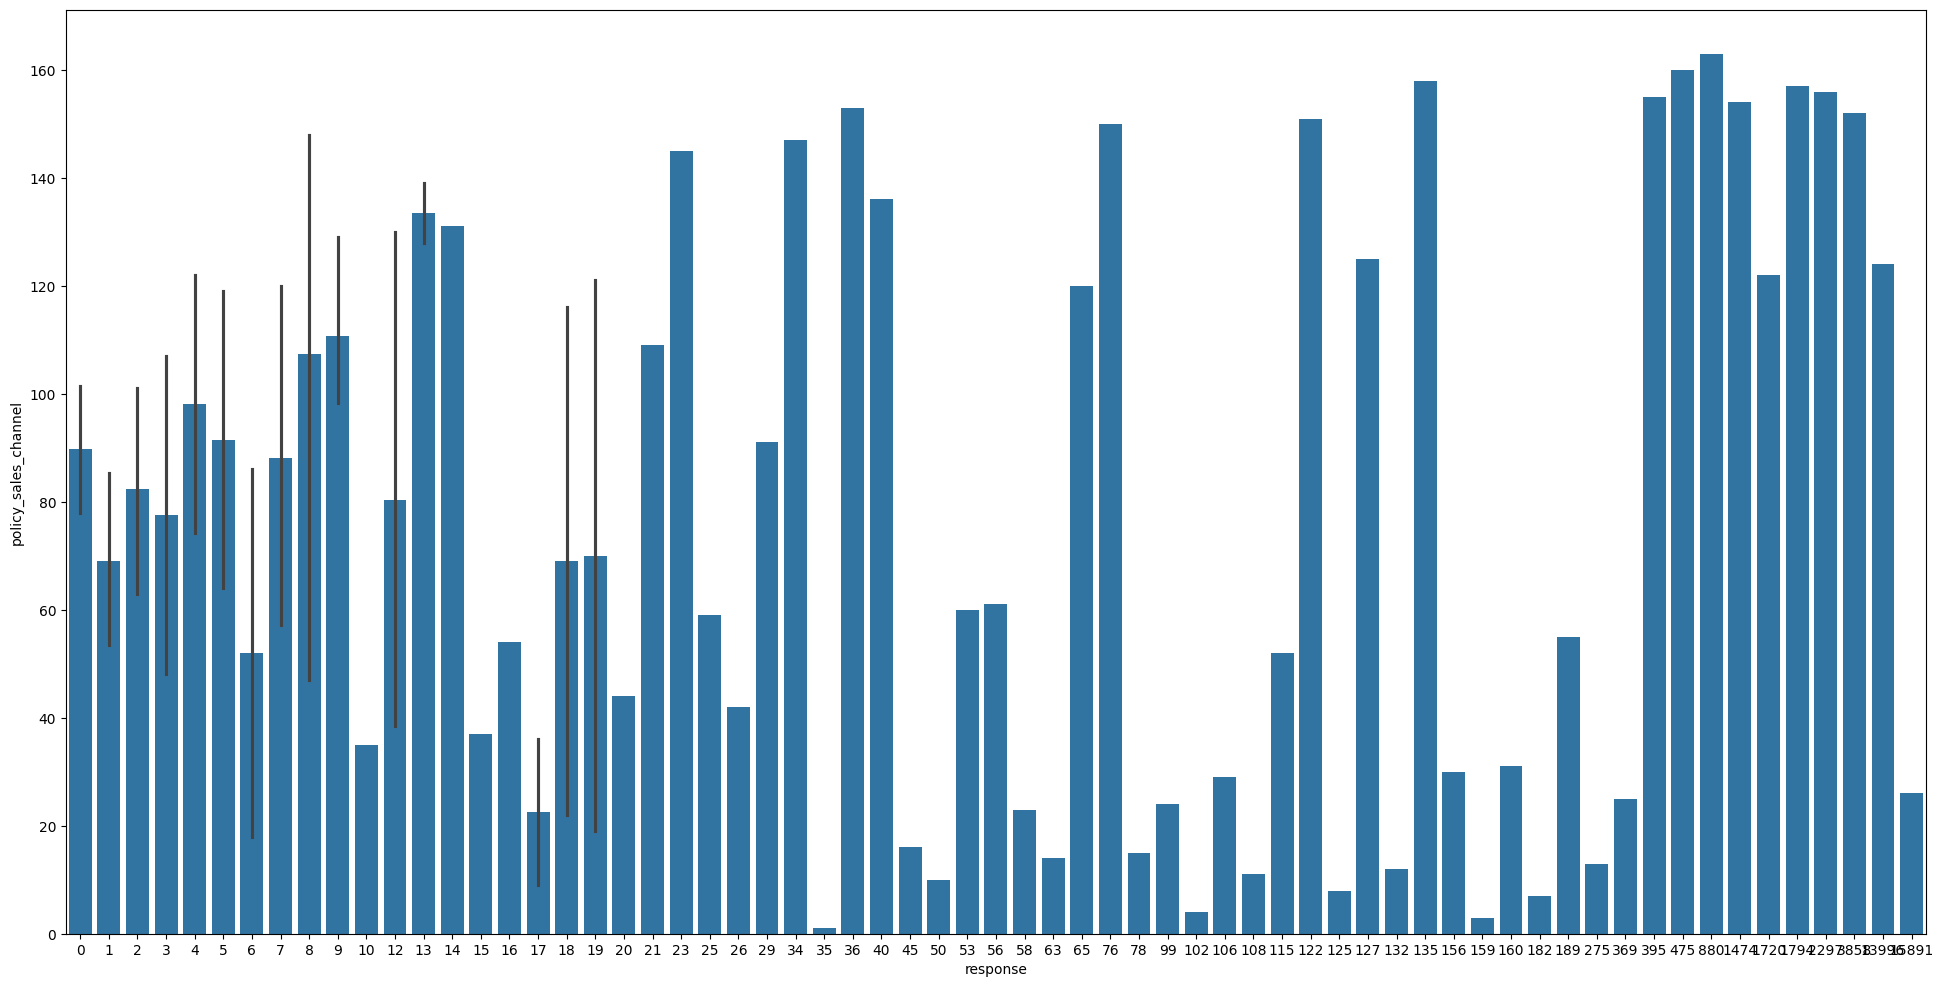

In [31]:
#'policy_sales_channel'
plt.figure( figsize=(24, 12 ))
aux = df4[['policy_sales_channel', 'response']].groupby( 'policy_sales_channel').sum().reset_index()
sns.barplot( x='response', y='policy_sales_channel', data=aux )

<Axes: xlabel='vintage', ylabel='Count'>

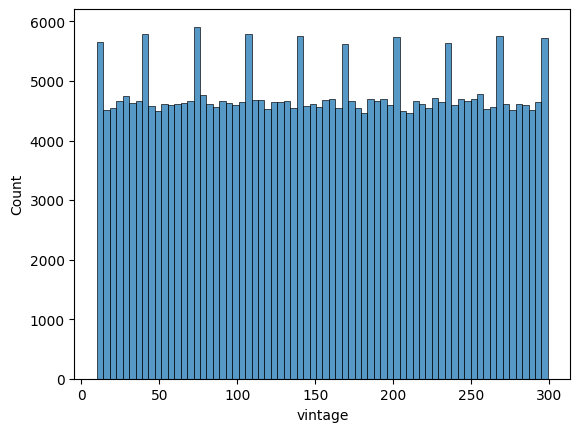

In [32]:
#'vintage'
aux00 = df4.loc[df4['response'] == 0, 'vintage']
sns.histplot( aux00 )

## 5.0. Data Preparation

In [33]:
df5 = df4.copy()

In [36]:
X = df4.drop( 'response', axis=1 )
y = df4['response'].copy() 

x_train, x_validation, y_train, y_validation = ms.train_test_split( X, y, test_size=0.20 )

df5 = pd.concat( [x_train, y_train], axis=1 )

## Standardization

In [40]:
ss = pp.StandardScaler()

# annual_premium
df5['annual_premium'] = ss.fit_transform( df5[['annual_premium']].values )

## Rescaling

In [43]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# Age
df5['age'] = mms_age.fit_transform( df5[['age']].values )

# vintage
df5['vintage'] = mms_vintage.fit_transform( df5[['vintage']].values )

## Encoder

In [44]:
# gender - One Hot Encoding / Target Encoding
target_encode_gender = df5.groupby( 'gender' )['response'].mean()
df5.loc[:, 'gender'] = df5['gender'].map( target_encode_gender )

# region_code - Target Encoding / Frequency Encoding
target_encode_region_code = df5.groupby( 'region_code' )['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map( target_encode_region_code )

# vehicle_age - One Hot Encoding / Frequency Encoding
df5 = pd.get_dummies( df5, prefix='vehicle_age', columns=['vehicle_age'] )

# policy_sales_channel - Target Encoding / Frequency Encoding
fe_policy_sales_channel = df5.groupby( 'policy_sales_channel' ).size() / len( df5 ) 
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map( fe_policy_sales_channel )

KeyError: "None of [Index(['vehicle_age'], dtype='object')] are in the [columns]"

## 5.4. Validation Preparation

In [45]:
# gender
x_validation.loc[:, 'gender'] =  x_validation.loc[:, 'gender'].map( target_encode_gender )

# age
x_validation.loc[:, 'age'] = mms_age.transform( x_validation[['age']].values )

# region_code
x_validation.loc[:, 'region_code'] = x_validation.loc[:, 'region_code'].map( target_encode_region_code )

# vehicle_age
x_validation = pd.get_dummies( x_validation, prefix='vehicle_age', columns=['vehicle_age'] )

# annual_premium
x_validation.loc[:, 'annual_premium'] = ss.transform( x_validation[['annual_premium']].values )

# policy_sales_channel
x_validation.loc[:, 'policy_sales_channel'] = x_validation['policy_sales_channel'].map( fe_policy_sales_channel )

# vintage
x_validation.loc[:, 'vintage'] = mms_vintage.transform( x_validation[['vintage']].values )

# fillna
x_validation = x_validation.fillna( 0 )

C:\Users\andremanzano\AppData\Local\Temp\ipykernel_3532\1030236340.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.07692308 0.49230769 0.50769231 ... 0.30769231 0.58461538 0.04615385]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_validation.loc[:, 'age'] = mms_age.transform( x_validation[['age']].values )
C:\Users\andremanzano\AppData\Local\Temp\ipykernel_3532\1030236340.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.7266436  0.31487889 0.84083045 ... 0.38408304 0.35986159 0.41176471]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_validation.loc[:, 'vintage'] = mms_vintage.transform( x_validation[['vintage']].values )
C:\Users\andremanzano\AppData\Local\Temp\ipykernel_3532\1030236340.py:23: FutureWarning: Downcasting object dtype arrays on

## 6.0. Feature Selection

## 6.2. Features Importancia

In [46]:
# model definition
forest = en.ExtraTreesClassifier( n_estimators=250, random_state=0, n_jobs=-1 )

# data preparation
x_train_n = df5.drop( ['id', 'response'], axis=1 )
y_train_n = y_train.values
forest.fit( x_train_n, y_train_n )

,n_estimators,250
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


Feature ranking:
                        feature  importance
0                       vintage    0.273289
0                annual_premium    0.245416
0                           age    0.161295
0                   region_code    0.107756
0                vehicle_damage    0.068643
0          policy_sales_channel    0.059848
0            previously_insured    0.055852
0      vehicle_age_below_1_year    0.014149
0  vehicle_age_between_1_2_year    0.006082
0                        gender    0.004747
0      vehicle_age_over_2_years    0.002423
0               driving_license    0.000499


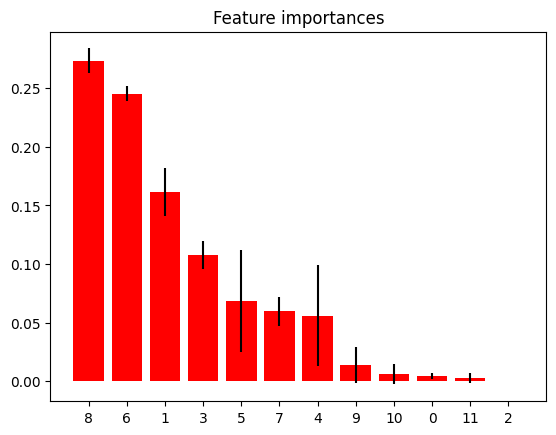

In [48]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
df = pd.DataFrame()
for i, j in zip( x_train_n, forest.feature_importances_ ):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[0] )
    df = pd.concat( [df, aux], axis=0 )
    
print( df.sort_values( 'importance', ascending=False ) )

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train_n.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

## 7.0. Machine Learning

In [49]:
cols_selected = ['annual_premium', 'vintage', 'age', 'region_code', 'vehicle_damage', 'previously_insured',
                 'policy_sales_channel']

x_train = df5[ cols_selected ]
x_val = x_validation[ cols_selected ]
y_val = y_validation.copy()

## 7.1. KNN

In [50]:
# model definition
knn_model = nh.KNeighborsClassifier( n_neighbors=7 )

# model training
knn_model.fit( x_train, y_train )

# model prediction - Poder de GENERALIZACAO 
yhat_knn = knn_model.predict_proba( x_val )

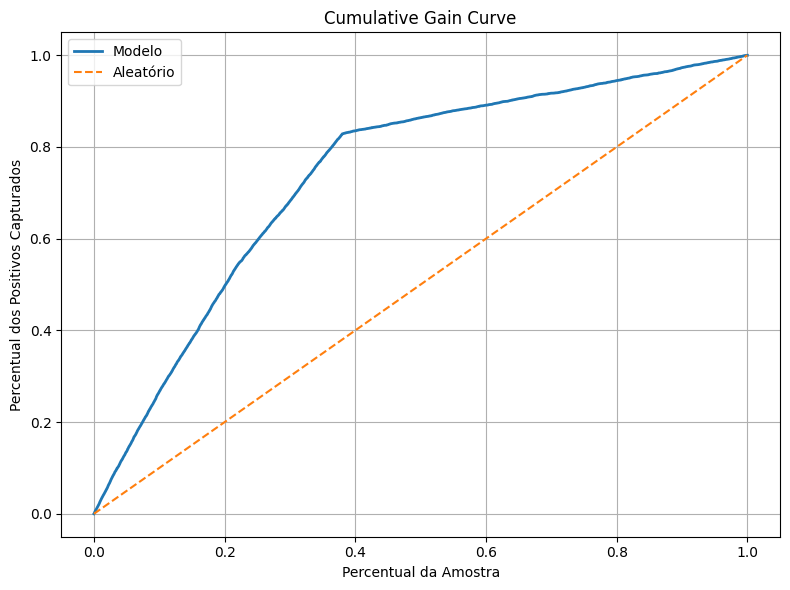

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Garantir que yhat_knn seja probabilidade da classe positiva
y_proba = yhat_knn[:, 1] if yhat_knn.ndim > 1 else yhat_knn
y_true = y_val

# Ordenar pela probabilidade do maior para menor
order = np.argsort(y_proba)[::-1]
y_true_sorted = np.array(y_true)[order]

# Percentual da amostra acumulada
x = np.arange(1, len(y_true_sorted) + 1) / len(y_true_sorted)

# Percentual de positivos acumulados
y = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)

# --- Plot ---
plt.figure(figsize=(8, 6))

plt.plot(x, y, linewidth=2, label="Modelo")
plt.plot([0, 1], [0, 1], "--", label="Aleatório")

plt.title("Cumulative Gain Curve")
plt.xlabel("Percentual da Amostra")
plt.ylabel("Percentual dos Positivos Capturados")

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
 # Accumulative Gain
 # skplt.metrics.plot_cumulative_gain( y_val, yhat_knn );

In [62]:
# model definition
lr_model = lm.LogisticRegression( random_state=42 ) 

# model training
lr_model.fit( x_train, y_train )

# model prediction
yhat_lr = lr_model.predict_proba( x_val )

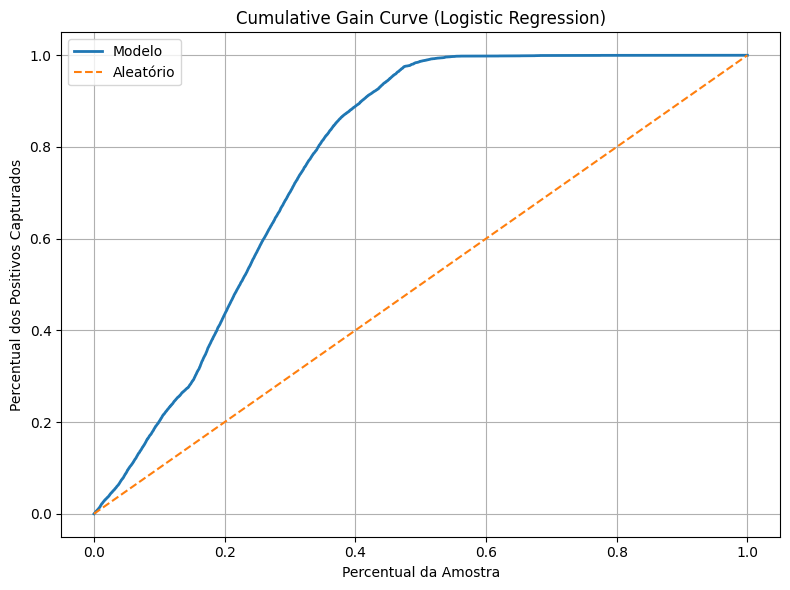

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Probabilidade da classe positiva
y_proba = yhat_lr[:, 1]
y_true = y_val

# Ordenar da maior probabilidade para a menor
order = np.argsort(y_proba)[::-1]
y_true_sorted = np.array(y_true)[order]

# Percentual acumulado da amostra
x = np.arange(1, len(y_true_sorted) + 1) / len(y_true_sorted)

# Percentual acumulado de positivos
y = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)

# --- Plot ---
plt.figure(figsize=(8, 6))

plt.plot(x, y, linewidth=2, label="Modelo")
plt.plot([0, 1], [0, 1], "--", label="Aleatório")

plt.title("Cumulative Gain Curve (Logistic Regression)")
plt.xlabel("Percentual da Amostra")
plt.ylabel("Percentual dos Positivos Capturados")

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [64]:
# Accumulative Gain
# skplt.metrics.plot_cumulative_gain( y_val, yhat_lr );

## 7.2. Extra Trees

In [65]:
# model definition
et = en.ExtraTreesClassifier( n_estimators=1000, n_jobs=-1, random_state=42 )

# model fit
et.fit( x_train, y_train )

# model predict
yhat_et = et.predict_proba( x_val )

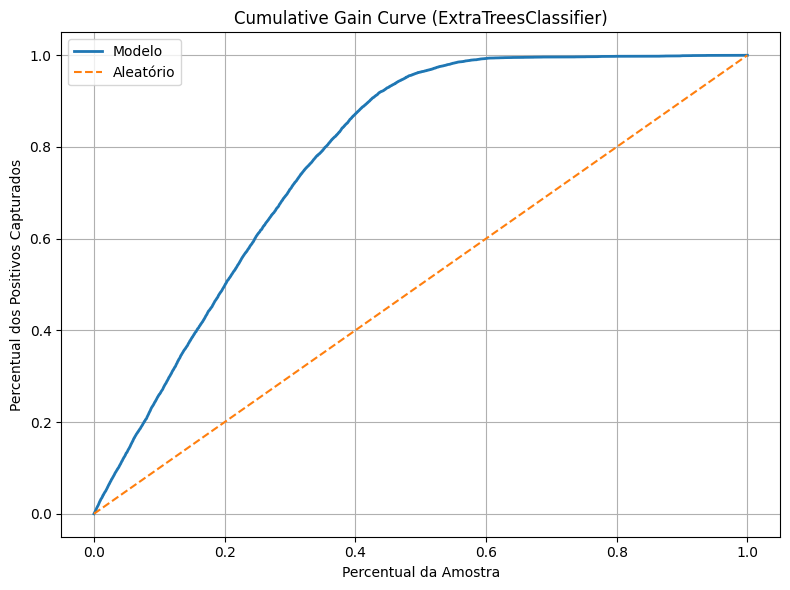

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Probabilidade da classe positiva
y_proba = yhat_et[:, 1]
y_true = y_val

# Ordenar da maior probabilidade para a menor
order = np.argsort(y_proba)[::-1]
y_true_sorted = np.array(y_true)[order]

# Percentual acumulado da amostra
x = np.arange(1, len(y_true_sorted) + 1) / len(y_true_sorted)

# Percentual acumulado de positivos
y = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)

# --- Plot ---
plt.figure(figsize=(8, 6))

plt.plot(x, y, linewidth=2, label="Modelo")
plt.plot([0, 1], [0, 1], "--", label="Aleatório")

plt.title("Cumulative Gain Curve (ExtraTreesClassifier)")
plt.xlabel("Percentual da Amostra")
plt.ylabel("Percentual dos Positivos Capturados")

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [67]:
 # Accumulative Gain
 # skplt.metrics.plot_cumulative_gain( y_val, yhat_knn );

## 7.2. Logistic Regression - Escolhido

In [68]:
# model definition
lr_model = lm.LogisticRegression( random_state=42 ) 

# model training
lr_model.fit( x_train, y_train )

# model prediction
yhat_lr = lr_model.predict_proba( x_val )

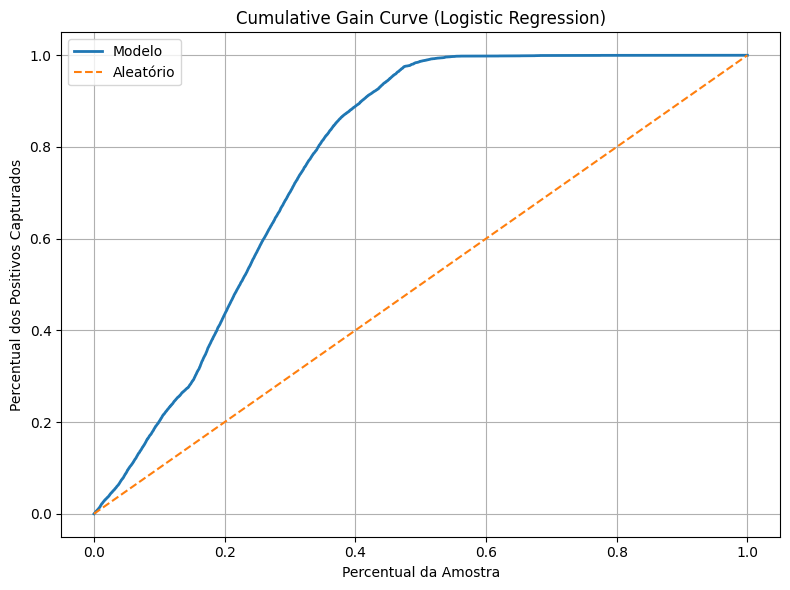

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Probabilidade da classe positiva
y_proba = yhat_lr[:, 1]
y_true = y_val

# Ordenar da maior probabilidade para a menor
order = np.argsort(y_proba)[::-1]
y_true_sorted = np.array(y_true)[order]

# Percentual acumulado da amostra
x = np.arange(1, len(y_true_sorted) + 1) / len(y_true_sorted)

# Percentual acumulado de positivos
y = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)

# --- Plot ---
plt.figure(figsize=(8, 6))

plt.plot(x, y, linewidth=2, label="Modelo")
plt.plot([0, 1], [0, 1], "--", label="Aleatório")

plt.title("Cumulative Gain Curve (Logistic Regression)")
plt.xlabel("Percentual da Amostra")
plt.ylabel("Percentual dos Positivos Capturados")

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [70]:
# Accumulative Gain
# skplt.metrics.plot_cumulative_gain( y_val, yhat_lr );

# 8.0. Model Performance 

In [71]:
def precision_at_k( data, k=2000 ):
    # reset index
    data = data.reset_index( drop=True )

    # create ranking order
    data['ranking'] = data.index + 1 

    data['precision_at_k'] = data['response'].cumsum() / data['ranking']

    return data.loc[k, 'precision_at_k']

In [72]:
def recall_at_k( data, k=2000 ):
    # reset index
    data = data.reset_index( drop=True )

    # create ranking order
    data['ranking'] = data.index + 1 

    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()

    return data.loc[k, 'recall_at_k']

In [73]:
# copy data
df8 = x_validation.copy()
df8['response'] = y_validation.copy()

# propensity score
df8['score'] = yhat_knn[:, 1].tolist()

# sorte clients by propensity score
df8 = df8.sort_values( 'score', ascending=False )

# compute precision at k
precision_at_50 = precision_at_k( df8, k=50 )
print( 'Precision at K: {}'.format( precision_at_50 ) )

# compute precision at k
precision_at_50 = recall_at_k( df8, k=50 )
print( 'Recall at K: {}'.format( precision_at_50 ) )

Precision at K: 0.4117647058823529
Recall at K: 0.0022717438338381653
